<div style="float:left;font-size:20px;">
    <h1>AltChart</h1>
</div><div style="float:right;"><img src="../../assets/banner.jpg"></div>

<hr>

In [4]:
import sys
sys.path.insert(0, r"R:\Projects\catana")
from catana.plotting.altchart import AltChart

In [5]:
import altair as alt
import numpy as np
import pandas as pd
from vega_datasets import data

## Example 1

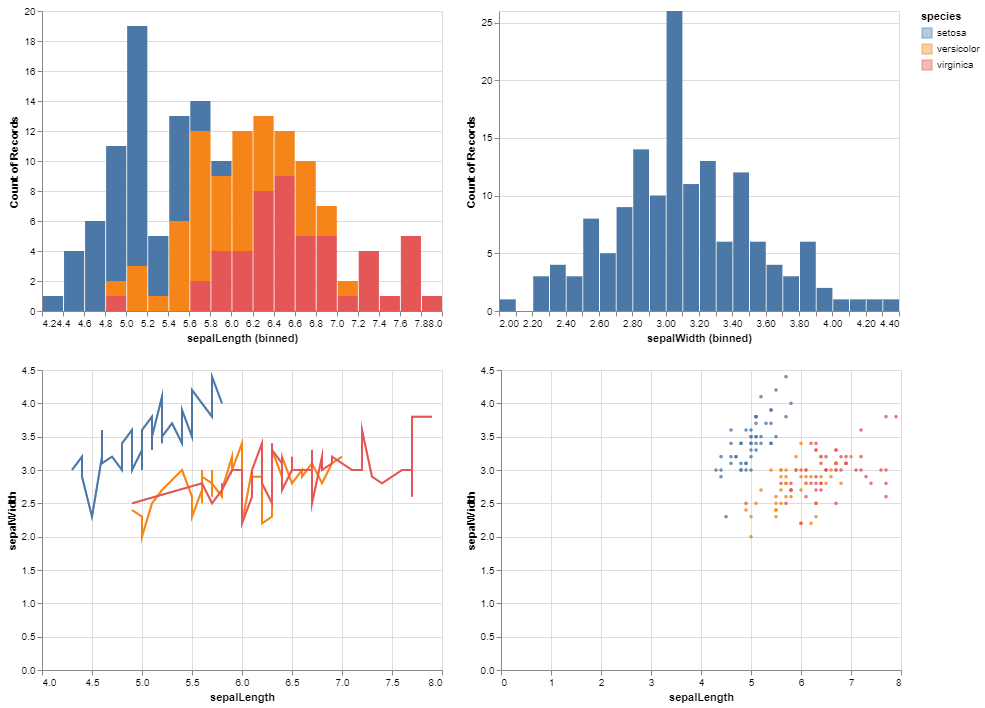

In [6]:
"""Plot a grid of four plots with selections"""
df = data.iris()
selection_1 = alt.selection(type='interval', encodings=['x'])
selection_2 = alt.selection(type='interval', resolve='global')

chart = AltChart(data=df, size=(2, 2)
    ).histogram(
        meta='Histogram with color',
        x='sepalLength', pos=(0, 0), interactive=True,
        brush=selection_1,  # Enables you to draw on the chart
        selection=selection_1,
        color='species',
    ).histogram(
        meta='Histogram without color',
        x='sepalWidth', pos=(0, 1), interactive=True,
        brush=selection_1,
        selection=selection_1,
    ).scatter(
        meta='2D relationship',
        x='sepalLength', y='sepalWidth', color='species', pos=(1, 1), interactive=True,
        selection=selection_1,
        brush=selection_1,  # Enables you to draw on the chart
    ).line(
        meta='1D projection of relationship, shows new projections with selections',
        x='sepalLength', y='sepalWidth', color='species', pos=(1, 0),
        selection=selection_1, brush=selection_1,
    )
chart.display()

## Example 2

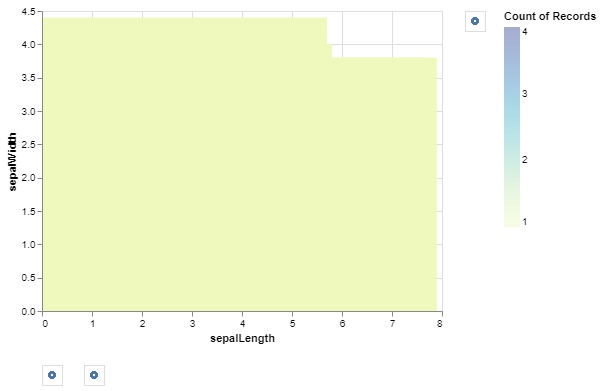

In [12]:
"""Plot a grid of four plots with selections"""
df = data.iris()
selection_1 = alt.selection(type='interval', resolve='global')
selection_2 = alt.selection(type='interval', resolve='global')
x, y = np.meshgrid(range(-5, 5), range(-5, 5))
z = x ** 2 + y ** 2
df2 = pd.DataFrame({'x': x.ravel().astype('i'),  # Cast to data type in to avoid Altair asking for the type
                   'y': y.ravel().astype('i'),
                   'z': z.ravel().astype('d')})

chart = AltChart(data=df, size=(2, 2)
    ).histogram2d(
        meta='2D Histogram with color',
        x='sepalLength', y='sepalWidth', z='count(sepalWidth)', pos=(0, 0),
        brush=selection_1, selection=selection_1,
)
#     ).histogram(
#         meta='1D Histogram with color',
#         x='species', bins=True, selection=selection_1, pos=(0, 1),
#     ).histogram2d(
#         data=df2,
#         meta='2D Histogram with color',
#         x='x:O', y='y:O', z='z:Q',
#         brush=selection_2, selection=selection_2, pos=(1, 1),
# )

chart.display()